In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) #1neurona entrada y salida
modelo = tf.keras.Sequential([capa]) #se usa modelo secuencial para unir


In [11]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [12]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #como ajustas pesos y sesgos para que aprenda y no desaprenda
    loss='mean_squared_error'
)

In [13]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!") #da 1000 vueltas con 7 datos

Comenzando entrenamiento...
Modelo entrenado!


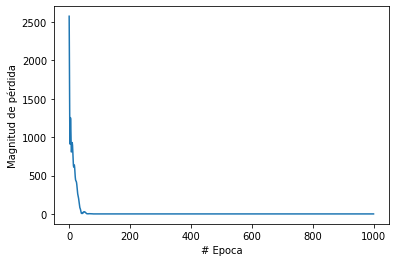

In [14]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

# que tan mal estan los resultados de la red en cada veulta que dio
# a mayor menos error

In [15]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.74748]] fahrenheit!


Estructura interna de la red

In [16]:
print("Variables internas del modelo")
print(capa.get_weights())
#peso 1.79 y sesgo de 31.9

Variables internas del modelo
[array([[1.7981346]], dtype=float32), array([31.930592], dtype=float32)]


In [17]:
# se veulve  más complejo entender
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

[array([[-0.07839815,  0.834328  ,  0.02951387]], dtype=float32), array([0.05114117, 4.0845485 , 4.045118  ], dtype=float32)]
[array([[-0.53767854, -0.3972903 , -0.23364428],
       [ 0.82651776, -1.0786052 ,  0.46060732],
       [ 1.1741351 , -1.3971201 , -0.8218443 ]], dtype=float32), array([ 4.055969 , -4.131214 ,  0.9149494], dtype=float32)]
[array([[ 1.0418957 ],
       [-1.0884825 ],
       [ 0.02360366]], dtype=float32), array([3.8362558], dtype=float32)]
